In [1]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [3]:
df['Diag'].value_counts()

Neg                  30
Pos - Early Conv     12
Pos - Early Acute    12
Pos - Late           10
Name: Diag, dtype: int64

In [4]:
df['bin_diag'] = "Neg"
df.loc[df['Diag']!="Neg", 'bin_diag'] = "Pos"

In [5]:
df.columns

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag', 'bin_diag'],
      dtype='object')

In [6]:
df['bin_diag'].value_counts()

Pos    34
Neg    30
Name: bin_diag, dtype: int64

In [7]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['bin_diag'])
 
# printing label
#label
df["state"]=label

In [8]:
#create target vector from state column and check top 5 values
y = df['state'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [9]:
#Originally used all available features but then refined using feature selection techniques
#described in the eda (exploratory data analysis notebook)
#X = df[['Hum IgG', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
#       'P58', 'P66', 'VlsE', 'ErpL', 'OspD']].values
#X = df[['P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58', 'P66', 'VlsE', 'ErpL', 'OspD']].values
#X = df[['VlsE', 'DbpA', 'DbpB', 'P58', 'OspC', 'BmpA']].values
X = df[['VlsE', 'DbpA', 'P58', 'OspC','ErpL','P66']].values  
X[0:5]

array([[12.45584216,  1.73861454,  1.93890358,  5.88212057,  1.07788947,
         2.02107262],
       [ 9.86827322,  8.27945815,  9.25600905,  0.82431779,  1.63255897,
         2.85953154],
       [11.61519582, 11.07250259,  3.66964123,  1.48438828,  2.02558011,
         3.94502199],
       [ 4.37009458,  1.19700767,  1.32133611,  1.39403148,  0.99934068,
         1.3724105 ],
       [10.35798884,  1.39707483,  1.51796498,  2.28407202,  1.23086668,
         1.64828868]])

In [10]:
from sklearn import preprocessing
#Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 2.61592421, -0.26375664, -0.23105999,  1.91807338, -0.5546976 ,
         0.50556666],
       [ 1.90290827,  2.35800234,  4.35997861, -0.32774603,  1.11784959,
         1.95119161],
       [ 2.38428043,  3.4775352 ,  0.85487261, -0.0346545 ,  2.30296328,
         3.82273481],
       [ 0.38786108, -0.48084831, -0.61854601, -0.07477569, -0.79155315,
        -0.61282106],
       [ 2.03785155, -0.40065562, -0.49517335,  0.32042958, -0.09341099,
        -0.13716699]])

In [11]:
from sklearn.model_selection import train_test_split
#to provide reproducible pseudo random result, use "random_state=n", where n is a numeric value
#remove this for a 'more random' result that changes on each invocation
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (48, 6) (48,)
Test set: (16, 6) (16,)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=1)
#parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
parameters = {'solver': ['lbfgs','sgd','adam'], 'hidden_layer_sizes':[6,8,10,12], 'max_iter': [2000], 'alpha': [.0001,.001,.01,.1,1] }
grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, refit=True)

 

In [13]:
grid.fit(X_train, y_train) 

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [6, 8, 10, 12],
                         'max_iter': [2000],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [14]:
print(grid.best_estimator_)
print(grid.get_params())

MLPClassifier(hidden_layer_sizes=10, max_iter=2000)
{'cv': None, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': None, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(), 'n_jobs': -1, 'param_grid': {'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [6, 8, 10, 12], 'max_iter': [2000], 'alpha': [0.0001, 0.001, 0

In [15]:
clf = grid.best_estimator_
clf.score(X_train,y_train)

0.9583333333333334

In [16]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)
train_score = accuracy_score(predictions_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, y_test)
print("score on test data: ", test_score)


score on train data:  0.9583333333333334
score on test data:  0.875


In [17]:
from sklearn.metrics import confusion_matrix
print('Training confusion matrix:')
confusion_matrix(predictions_train, y_train)



Training confusion matrix:


array([[22,  2],
       [ 0, 24]], dtype=int64)

In [18]:
print('Testing confusion matrix:')
cnf_matrix = confusion_matrix(predictions_test, y_test)
print(cnf_matrix)

Testing confusion matrix:
[[7 1]
 [1 7]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(predictions_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16



In [20]:
from sklearn.metrics import multilabel_confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7 1]
 [1 7]]


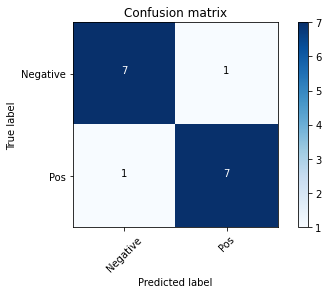

In [21]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Pos'],normalize= False,  title='Confusion matrix')

In [23]:
#this cell includes code to do 'n' runs of random train/tests on
#the whole data set using the best estimator settings from gridsearchCV
from sklearn import metrics 
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0

count = 100
new_model = MLPClassifier(alpha=grid.best_estimator_.alpha, hidden_layer_sizes=grid.best_estimator_.hidden_layer_sizes, 
                          max_iter=grid.best_estimator_.max_iter, solver=grid.best_estimator_.solver)
for n in range(1, count+1):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, stratify=y)   

    new_model.fit(X_tr, y_tr)
    yh = new_model.predict(X_te)
    cr = classification_report(y_te, yh, output_dict=True)
    
    curr_accuracy = metrics.accuracy_score(y_te,yh)
    curr_sensitivity = cr["1"]["recall"]
    curr_specificity = cr["0"]["recall"]
    print("Run: %d" % (n))
    print(' Accuracy: %.3f ' % (curr_accuracy))
    print(' Sensitivity: %.3f ' % (curr_sensitivity))
    print(' Specificity: %.3f ' % (curr_specificity))
    
    sensitivity_sum = sensitivity_sum + curr_sensitivity
    specificity_sum = specificity_sum + curr_specificity
    accuracy_sum = accuracy_sum + curr_accuracy

average_accuracy = accuracy_sum/count
average_sensitivity = sensitivity_sum/count
average_specificity = specificity_sum/count
print('')
print('Average Accuracy: %.3f ' % (average_accuracy))
print('Average Sensitivity: %.3f ' % (average_sensitivity))
print('Average Specificity: %.3f ' % (average_specificity))

Run: 1
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 2
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 3
 Accuracy: 0.875 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 4
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 5
 Accuracy: 1.000 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 6
 Accuracy: 0.875 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 7
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 8
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 0.714 
Run: 9
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 10
 Accuracy: 1.000 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 11
 Accuracy: 0.875 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 12
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 13
 Accuracy: 1.000 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 14
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 15
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specifici